In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
Files=files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [ ]:
## check null
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
## drop_duplicates
Data1 = train.drop_duplicates()

In [ ]:
df = pd.DataFrame(train)
statistics = df.describe()
# Mode is not included in df.describe(), so we calculate it separately
mode = df.mode().iloc[0]
# Add 'mode' to the statistics DataFrame
statistics.loc['mode'] = mode
print(statistics)

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   
mode      618.000000     0.0000     0.500000     1.000000     0.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    

In [ ]:
#EDA ON DATASET
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train.loc[(train['price_range'] ==0), 'price_range'] = 'Low Cost'
train.loc[(train['price_range'] ==1), 'price_range'] = 'Medium Cost'
train.loc[(train['price_range'] ==2), 'price_range'] = 'High Cost'
train.loc[(train['price_range'] ==3), 'price_range'] = 'Very High Cost'

train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Medium Cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,High Cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,High Cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,High Cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,Medium Cost


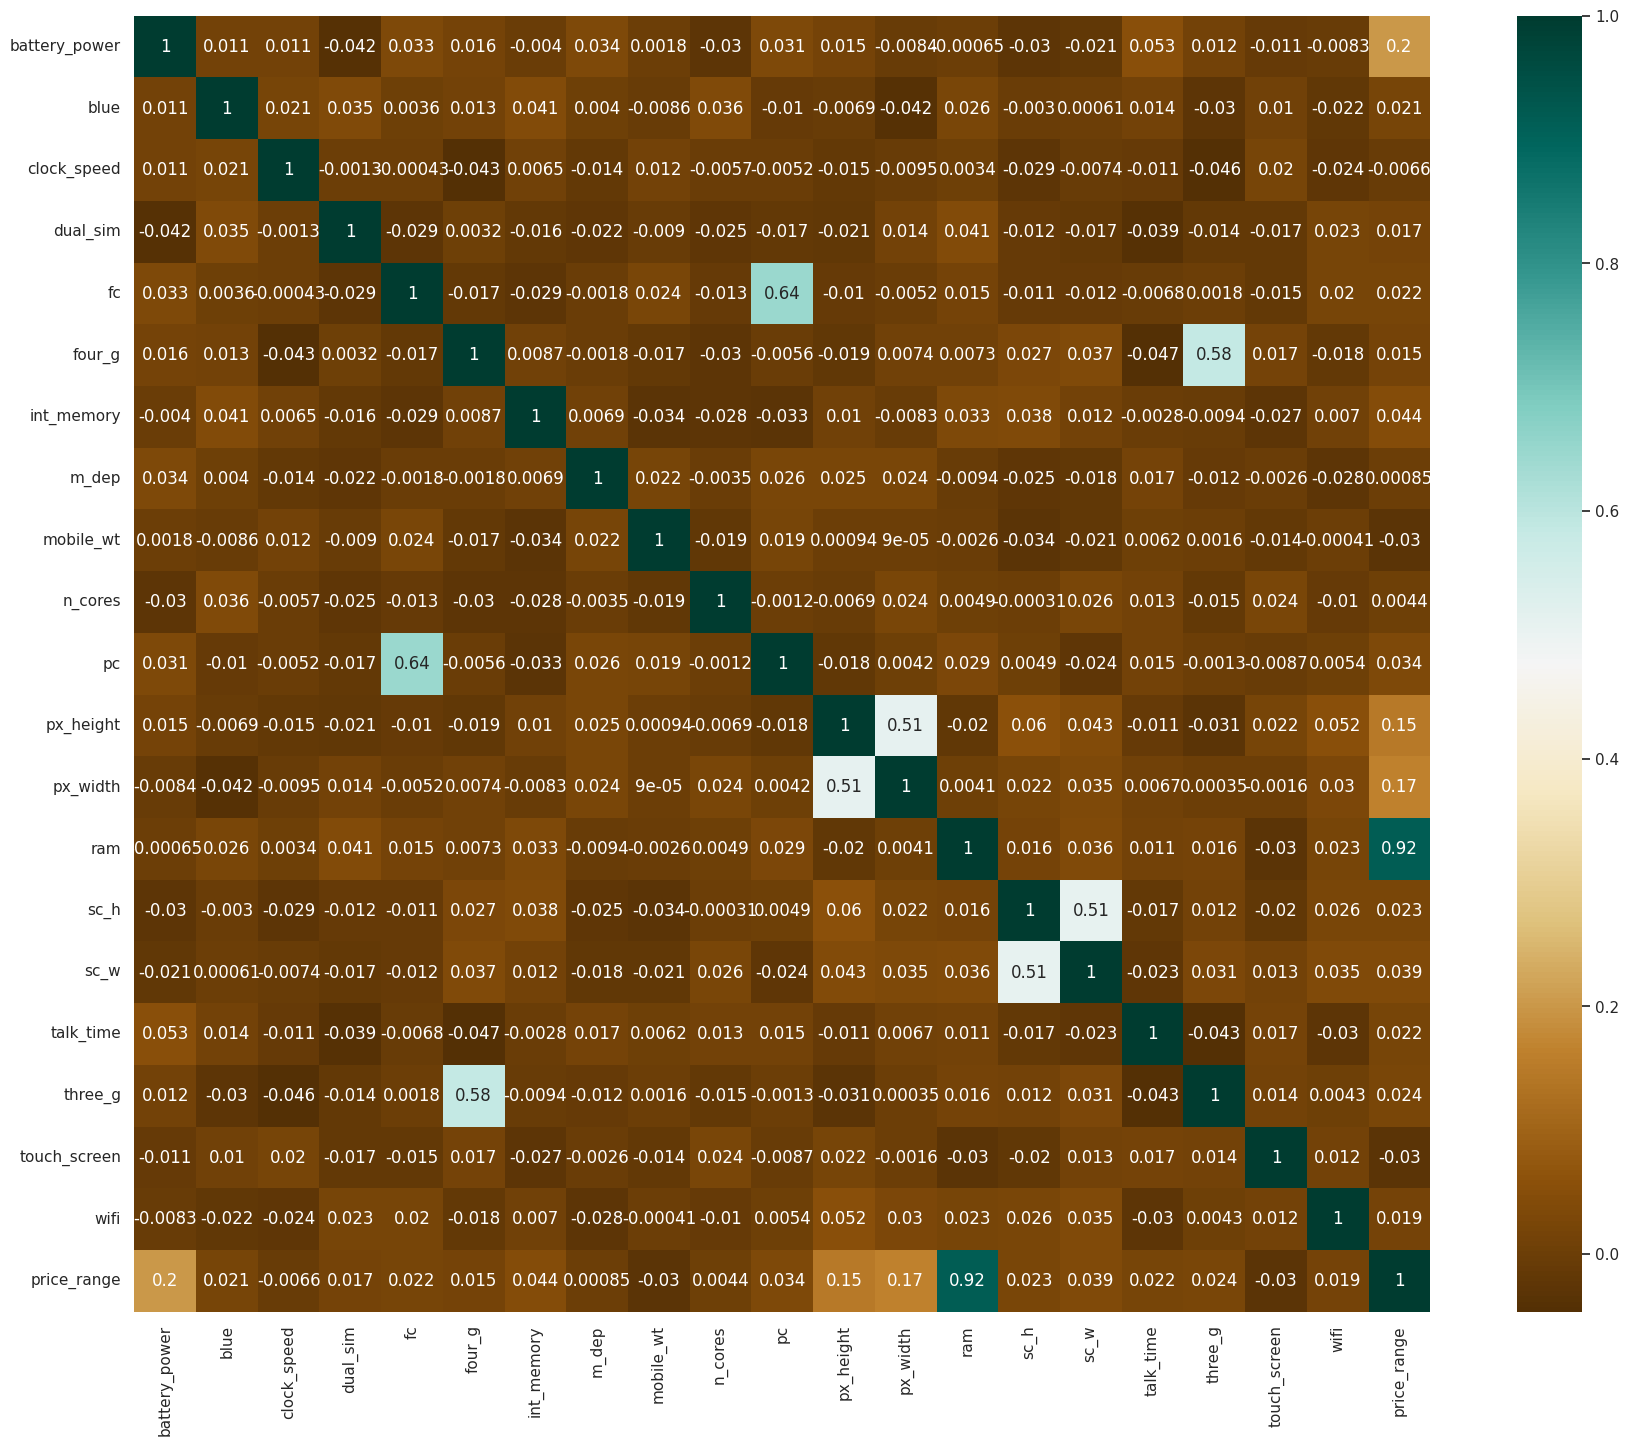

In [ ]:
## Show correlation1
plt.figure(figsize = (20,16))
sns.heatmap(train.corr(), annot=True, square=True, cmap = 'BrBG')
plt.show()

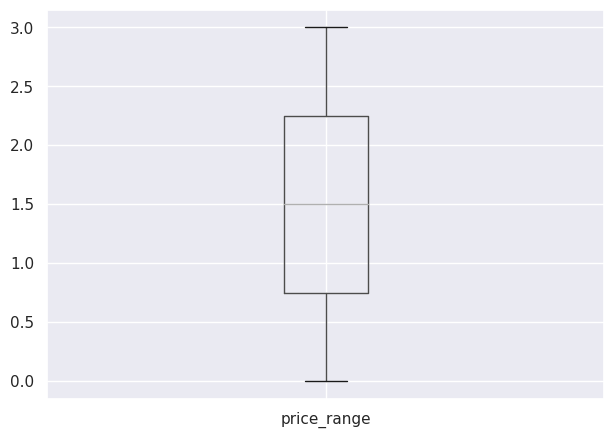

In [ ]:
import matplotlib.pyplot as plot
b_plot = train.boxplot(column = 'price_range')
b_plot.plot()
plot.show()

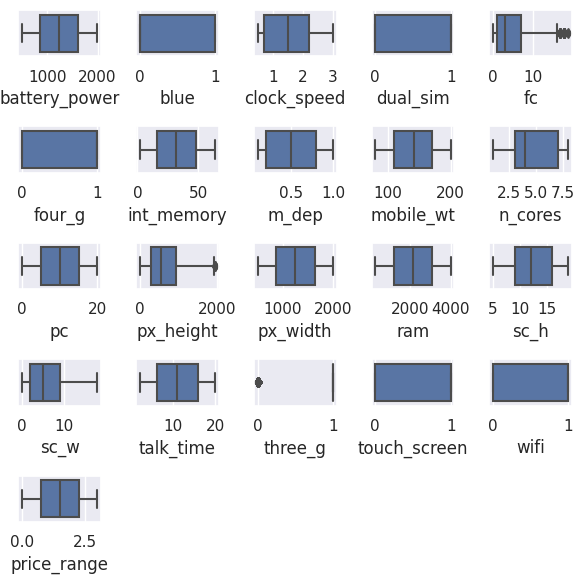

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'


plt.figure(figsize=(6, 6))

for i, col in enumerate(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=col, data=train)

plt.tight_layout()
plt.show()

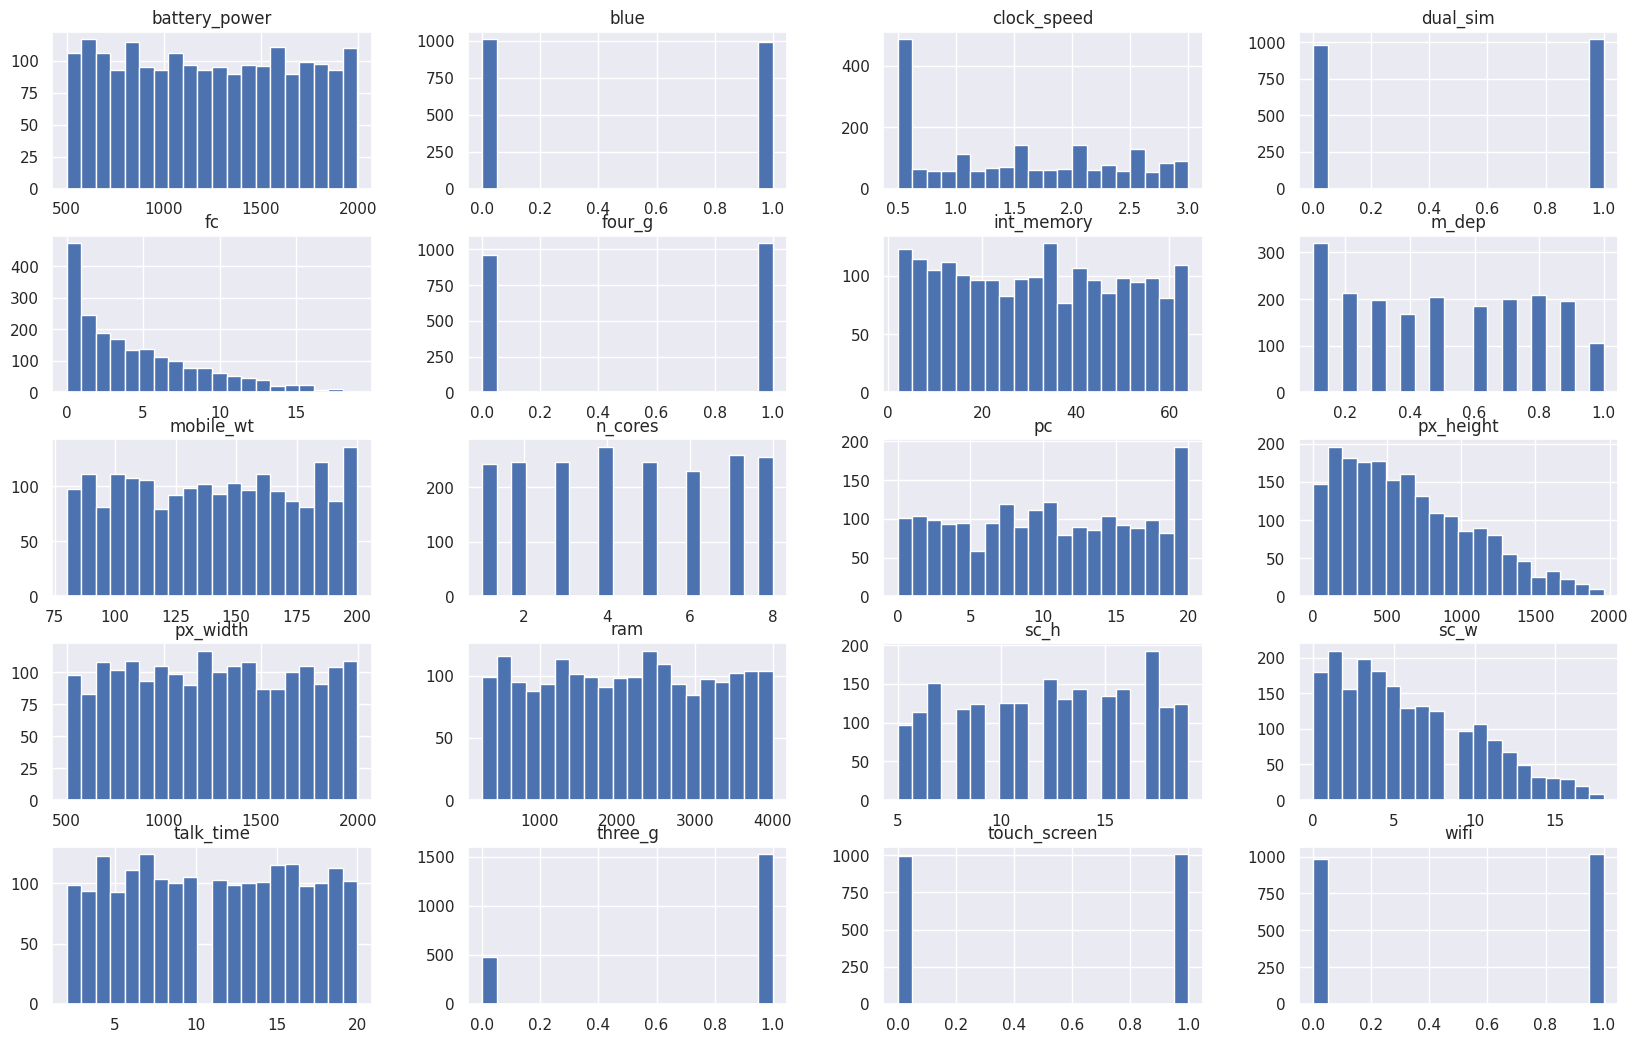

In [ ]:
train.hist(bins=20, figsize=(18,12))
plt.show()

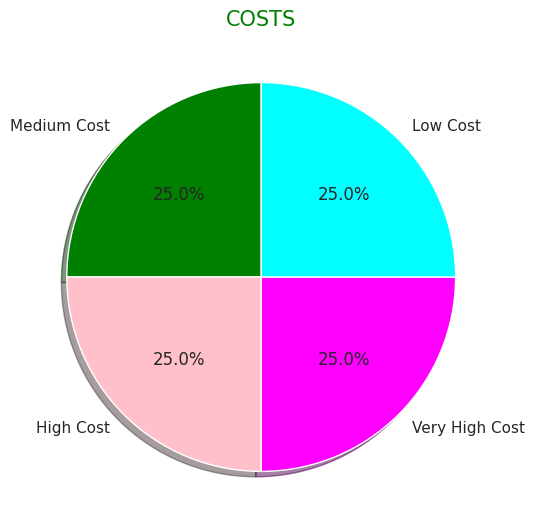

In [ ]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan',"orange","yellow"]
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

In [210]:
import plotly.express as px
px.box(train,x='price_range',y='ram',
       color='price_range',template='ggplot2',
       labels={'price_range':'Price Range',
               'ram':'ram'},
       title="<b>Effect of Ram Capacity on Price")

In [ ]:
px.box(train,x='price_range',y='battery_power',
       color='price_range',template='ggplot2',
       labels={'price_range':'price_range',
               'battery_power':'battery_power'},
       title='<b>Battery power by price')

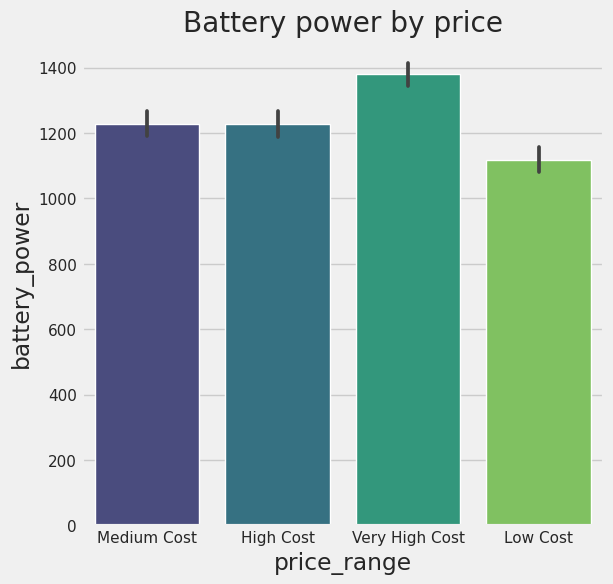

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.title("Battery power by price")
sns.set(font_scale=1)
sns.barplot(data=train, y="battery_power",x="price_range",palette="viridis")
plt.show()

<Axes: xlabel='price_range', ylabel='int_memory'>

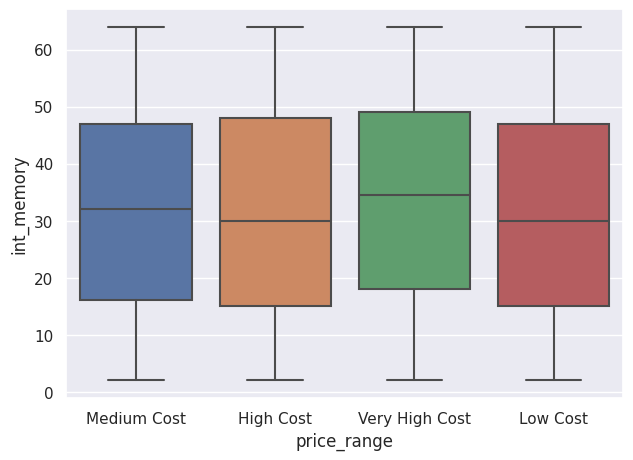

In [ ]:
sns.boxplot(data=train, y="int_memory", x="price_range")

In [ ]:
#RAM stands for random-access memory, but what does that mean? Your computer RAM is essentially short term memory where data is stored as the processor needs it. This isn't to be confused with long-term data that's stored on your hard drive, which stays there even when your computer is turned off.

In [ ]:
#RESULT

#As the battery power increases, we can say that the price increases.
#The higher the RAM capacity, the higher the price.
#The price goes up when the phone has 3G.
#The percentages of cheap, medium, expensive, very expensive phones in the dataset are equal.

In [ ]:
Data1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
Data1=Data1.reset_index()

In [ ]:
import numpy as np
Q1 = np.percentile(train["talk_time"], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(train["talk_time"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UpperLimit=Q3 + 1.5*IQR
LowerLimit=Q1 - 1.5*IQR

In [ ]:
OutlierList=[]
for i in range (train["talk_time"].shape[0]):
  if train["talk_time"][i]>=UpperLimit:
    OutlierList.append(i)
  elif train["talk_time"][i]<=LowerLimit:
    OutlierList.append(i)
print(OutlierList)

[]


In [ ]:
len(OutlierList)

0

In [ ]:
Data1=Data1.drop(OutlierList)

In [ ]:
# Define the dependent variable and predictors for training set
Y1=train['price_range']

In [231]:
X1=train[['battery_power', 'blue', 'clock_speed', 'dual_sim',
       'fc', 'four_g', 'int_memory', 'm_dep', 'n_cores', 'pc',
       'px_height', 'ram', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
p = train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = p.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(p.values, i) for i in range(len(p.columns))]

print(vif_data)

          feature        VIF
0   battery_power   8.076717
1            blue   1.981927
2     clock_speed   4.260479
3        dual_sim   2.015006
4              fc   3.413529
5          four_g   3.194321
6      int_memory   3.961239
7           m_dep   3.911115
8       mobile_wt  12.972548
9         n_cores   4.646070
10             pc   6.228797
11      px_height   4.262680
12       px_width  11.766282
13            ram   4.688608
14           sc_h  11.510780
15           sc_w   3.720867
16      talk_time   4.859144
17        three_g   6.191783
18   touch_screen   1.989078
19           wifi   2.021012


In [233]:
#MULTINOMIA

from sklearn.naive_bayes import MultinomialNB
CLF_MN=MultinomialNB()
CLF_MN=CLF_MN.fit(X_train,Y_train)
Y_pred=CLF_MN.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

                precision    recall  f1-score   support

     High Cost       0.38      0.36      0.37        92
      Low Cost       0.78      0.76      0.77       105
   Medium Cost       0.41      0.42      0.42        91
Very High Cost       0.57      0.61      0.59       112

      accuracy                           0.55       400
     macro avg       0.54      0.54      0.54       400
  weighted avg       0.55      0.55      0.55       400

Accuracy: 54.75%


In [234]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.6325

In [235]:
from sklearn.metrics import accuracy_score

# Predict the classes on the test set
Y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 63.25%


In [236]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
CLF_svc = SVC()

# fitting x samples and y classes
CLF_svc=CLF_svc.fit(X_train,Y_train)
Y_pred=CLF_svc.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


                precision    recall  f1-score   support

     High Cost       0.94      0.95      0.94        92
      Low Cost       0.99      0.98      0.99       105
   Medium Cost       0.95      0.99      0.97        91
Very High Cost       0.98      0.95      0.96       112

      accuracy                           0.96       400
     macro avg       0.96      0.97      0.96       400
  weighted avg       0.97      0.96      0.97       400

Accuracy: 96.50%


In [237]:
from sklearn.ensemble import RandomForestClassifier
CLF_RandFr =  RandomForestClassifier()
CLF_RandFr=CLF_RandFr.fit(X_train,Y_train)
Y_pred=CLF_RandFr.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

                precision    recall  f1-score   support

     High Cost       0.81      0.85      0.83        92
      Low Cost       0.94      0.95      0.95       105
   Medium Cost       0.88      0.87      0.87        91
Very High Cost       0.93      0.89      0.91       112

      accuracy                           0.89       400
     macro avg       0.89      0.89      0.89       400
  weighted avg       0.89      0.89      0.89       400

Accuracy: 89.25%


In [238]:
from sklearn.ensemble import BaggingClassifier

# Create a Decision Tree classifier
rf = RandomForestClassifier()
# Create a BaggingClassifier
model = BaggingClassifier(base_estimator=rf, n_estimators=10)

# Fit the model on the training data
classifiers = model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

                precision    recall  f1-score   support

     High Cost       0.81      0.85      0.83        92
      Low Cost       0.94      0.95      0.95       105
   Medium Cost       0.88      0.87      0.87        91
Very High Cost       0.93      0.89      0.91       112

      accuracy                           0.89       400
     macro avg       0.89      0.89      0.89       400
  weighted avg       0.89      0.89      0.89       400

Accuracy: 89.25%


In [239]:
from sklearn.tree import DecisionTreeClassifier
CLF_DecisionT =  DecisionTreeClassifier()
CLF_DecisionT=CLF_DecisionT.fit(X_train,Y_train)
Y_pred=CLF_RandFr.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

                precision    recall  f1-score   support

     High Cost       0.81      0.85      0.83        92
      Low Cost       0.94      0.95      0.95       105
   Medium Cost       0.88      0.87      0.87        91
Very High Cost       0.93      0.89      0.91       112

      accuracy                           0.89       400
     macro avg       0.89      0.89      0.89       400
  weighted avg       0.89      0.89      0.89       400



In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Create a Decision Tree classifier
dc = DecisionTreeClassifier()

# Split your dataset into training and testing sets


# Create a BaggingClassifier
model = BaggingClassifier(base_estimator=dc, n_estimators=10)

# Fit the model on the training data
classifiers = model.fit(X_train, Y_train)



# Make predictions on the test set
y_pred = model.predict(X_test)

In [242]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

Accuracy: 0.8775
                precision    recall  f1-score   support

     High Cost       0.81      0.85      0.83        92
      Low Cost       0.94      0.95      0.95       105
   Medium Cost       0.88      0.87      0.87        91
Very High Cost       0.93      0.89      0.91       112

      accuracy                           0.89       400
     macro avg       0.89      0.89      0.89       400
  weighted avg       0.89      0.89      0.89       400



In [243]:
test_data = pd.read_csv("test.csv")

In [ ]:
test_data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [249]:
X_test_data = test_data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [252]:
Y_pred_test_data = CLF_svc.predict(X_test_data)
Y_pred_test_data

array(['Very High Cost', 'Very High Cost', 'High Cost', 'Very High Cost',
       'Medium Cost', 'Very High Cost', 'Very High Cost', 'Medium Cost',
       'Very High Cost', 'Low Cost', 'Very High Cost', 'Very High Cost',
       'Low Cost', 'Low Cost', 'High Cost', 'Low Cost', 'High Cost',
       'Medium Cost', 'Very High Cost', 'High Cost', 'Medium Cost',
       'Very High Cost', 'Medium Cost', 'Medium Cost', 'Very High Cost',
       'Low Cost', 'High Cost', 'Low Cost', 'Very High Cost', 'Low Cost',
       'High Cost', 'Low Cost', 'Very High Cost', 'Low Cost',
       'Medium Cost', 'Medium Cost', 'Very High Cost', 'Medium Cost',
       'High Cost', 'Medium Cost', 'Medium Cost', 'High Cost', 'Low Cost',
       'Low Cost', 'Low Cost', 'Medium Cost', 'Low Cost',
       'Very High Cost', 'Medium Cost', 'High Cost', 'Medium Cost',
       'Low Cost', 'Very High Cost', 'Low Cost', 'Very High Cost',
       'Medium Cost', 'Very High Cost', 'Medium Cost', 'Medium Cost',
       'Very High Cost', '